In [8]:
import pandas as pd
import os

data = pd.read_csv('weather_data/1. Weather Data.csv')


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
#Show no of records and features
print(data.shape)

#data type
print(data.info())

#first few rows
print(data.head())

(8784, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2       

In [14]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data_cleaned = data.dropna()  # Or use df.fillna(value) for filling

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [16]:
# Display duplicates
print(data.duplicated().sum())

# Drop duplicates
data_cleaned = data_cleaned.drop_duplicates()

0


In [17]:
#statistical summary
print(data_cleaned.describe())

            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


In [25]:
#identify outliers
#Calculating Interquartile range(IOQ) to detect outliers
# Align the DataFrame and Series before performing the comparison
aligned_data_cleaned, aligned_Q1 = data_cleaned.align(Q1 - 1.5 * IQR, axis=1, copy=False)
aligned_data_cleaned, aligned_Q3 = data_cleaned.align(Q3 + 1.5 * IQR, axis=1, copy=False)

# Calculate outliers
outliers = (aligned_data_cleaned < aligned_Q1) | (aligned_data_cleaned > aligned_Q3)

print(outliers.sum())

Date/Time              0
Dew Point Temp_C       0
Press_kPa            207
Rel Hum_%              2
Temp_C                 0
Visibility_km       3539
Weather                0
Wind Speed_km/h      162
dtype: int64


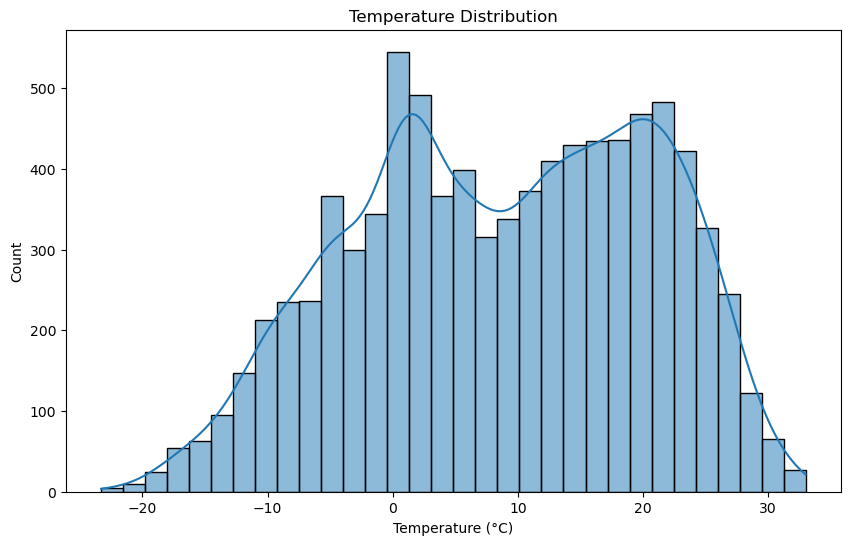

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Temp_C'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

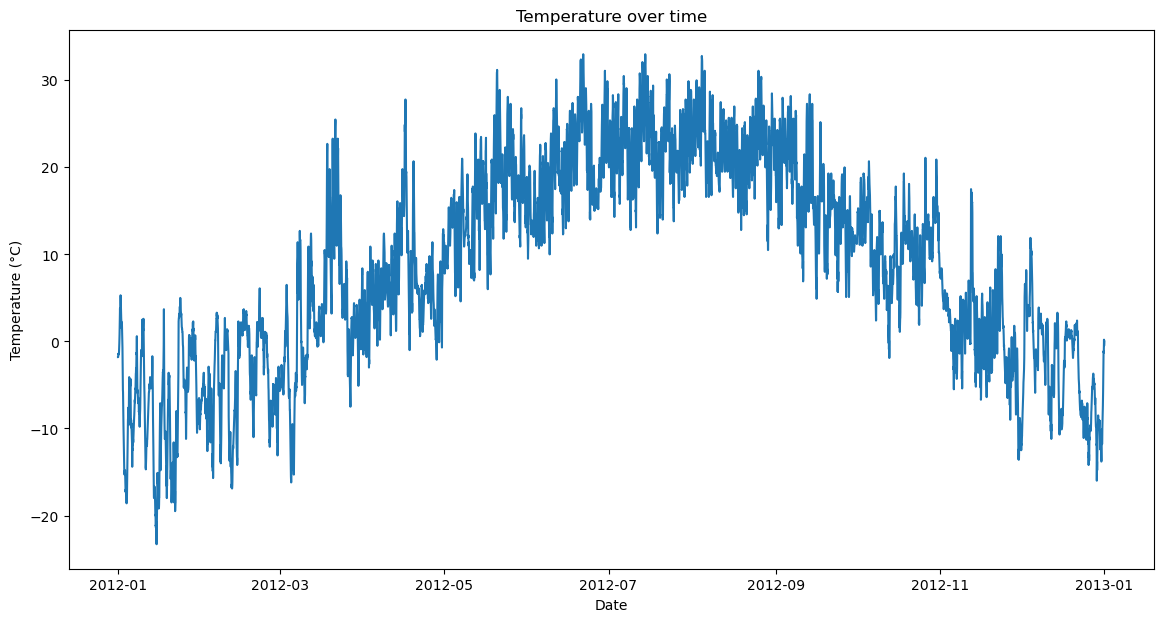

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date/Time is in datetime format
data_cleaned['Date/Time'] = pd.to_datetime(data_cleaned['Date/Time'])

#Time series of temperature
plt.figure(figsize=(14,7))
plt.plot(data_cleaned['Date/Time'], data_cleaned['Temp_C'])
plt.title('Temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

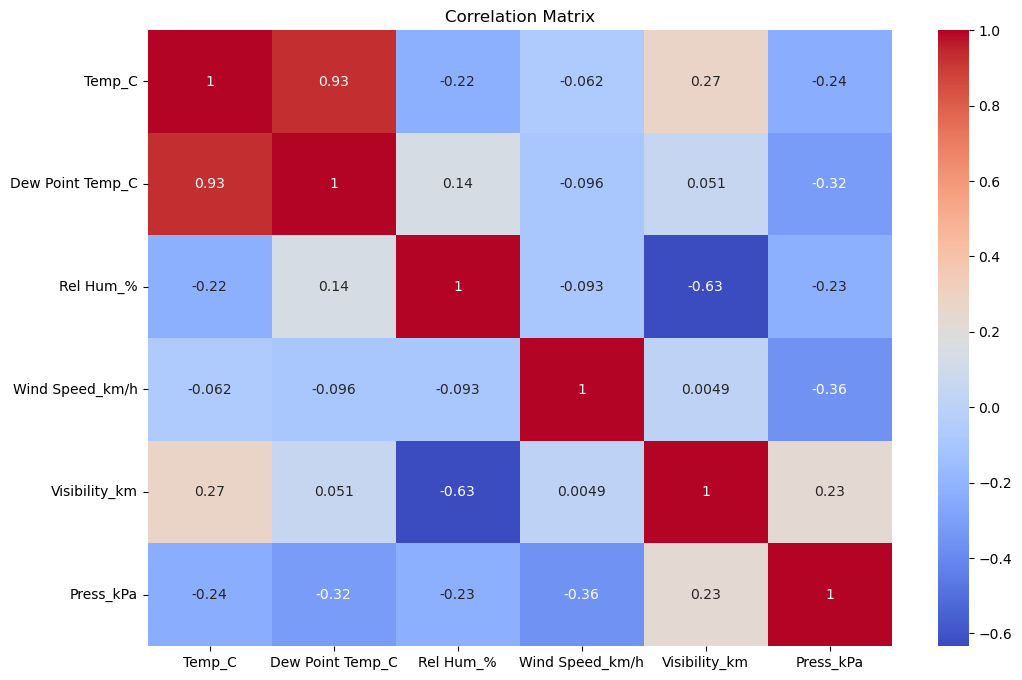

In [53]:
#correlation matrix
correlation = data_cleaned.corr(numeric_only=True)

#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

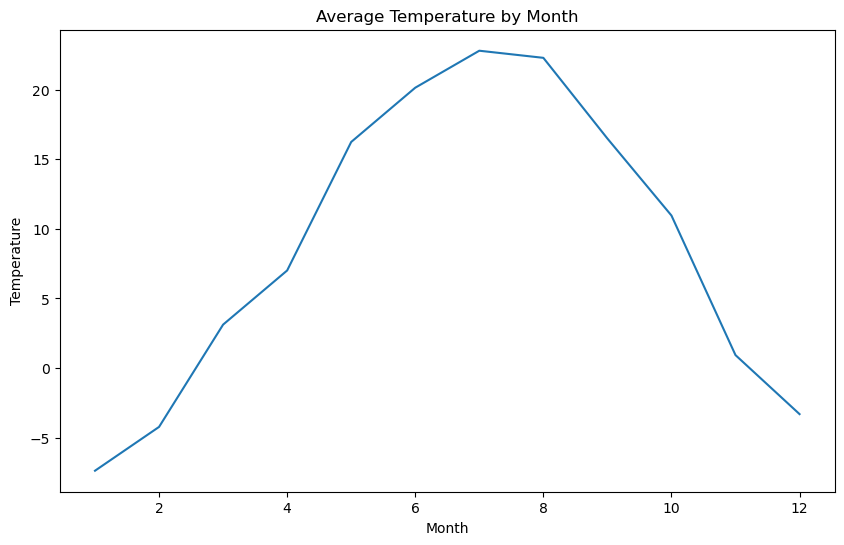

In [57]:
# Group by month to analyze trends
data_cleaned['month'] = pd.to_datetime(data_cleaned['Date/Time']).dt.month
monthly_trends = data_cleaned.groupby('month').mean(numeric_only=True)

# Example: Plot temperature variation by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends.index, monthly_trends['Temp_C'])
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()